<a href="https://colab.research.google.com/github/dstephenhaynes/DTSA5010BBC/blob/main/DTSA5010_BBC_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Download stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
train = pd.read_csv('https://raw.githubusercontent.com/dstephenhaynes/DTSA5010BBC/main/BBC%20News%20Train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/dstephenhaynes/DTSA5010BBC/main/BBC%20News%20Test.csv')
solution = pd.read_csv('https://raw.githubusercontent.com/dstephenhaynes/DTSA5010BBC/main/BBC%20News%20Sample%20Solution.csv')

In [19]:
train.info()
print()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.0+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  735 non-null    int64 
 1   Text       735 non-null    object
dtypes: int64(1), object(1)
memory usage: 11.6+ KB


In [20]:
train.head()

ArticleId                                               Text  Category
0       1833  worldcom ex-boss launches defence lawyers defe...  business
1        154  german business confidence slides german busin...  business
2       1101  bbc poll indicates economic gloom citizens in ...  business
3       1976  lifestyle  governs mobile choice  faster  bett...      tech
4        917  enron bosses in $168m payout eighteen former e...  business

In [21]:
test.head()

ArticleId                                               Text
0       1018  qpr keeper day heads for preston queens park r...
1       1319  software watching while you work software that...
2       1138  d arcy injury adds to ireland woe gordon d arc...
3        459  india s reliance family feud heats up the ongo...
4       1020  boro suffer morrison injury blow middlesbrough...

In [22]:
train.isnull().sum(), test.isnull().sum()

(ArticleId    0
 Text         0
 Category     0
 dtype: int64,
 ArticleId    0
 Text         0
 dtype: int64)

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Splitting the training data into training and validation sets
X_train_data, X_val_data, y_train, y_val = train_test_split(train['Text'], train['Category'], test_size=0.2, random_state=42)

# Preprocessing
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_train = tfidf_vectorizer.fit_transform(X_train_data)
X_val = tfidf_vectorizer.transform(X_val_data)

# Model Training
model = MultinomialNB()
model.fit(X_train, y_train)

# Prediction on Validation Set
val_predictions = model.predict(X_val)

# Evaluation
print(classification_report(y_val, val_predictions))

# Now, once you're satisfied with the model's performance on the validation set, you can train it on the entire training data and evaluate it on the test set
# Retrain the model on the full training data
X_train_full = tfidf_vectorizer.fit_transform(train['Text'])
model.fit(X_train_full, train['Category'])

# Prediction on Test Set
X_test = tfidf_vectorizer.transform(test['Text'])
test_predictions = model.predict(X_test)

# Since you don't have the true labels for the test set, you can't use classification_report, but you can save predictions or evaluate against any other available data or metrics you have.


               precision    recall  f1-score   support

     business       0.94      0.97      0.95        75
entertainment       1.00      0.96      0.98        46
     politics       0.91      0.95      0.93        56
        sport       0.97      1.00      0.98        63
         tech       0.98      0.90      0.94        58

     accuracy                           0.96       298
    macro avg       0.96      0.95      0.96       298
 weighted avg       0.96      0.96      0.96       298



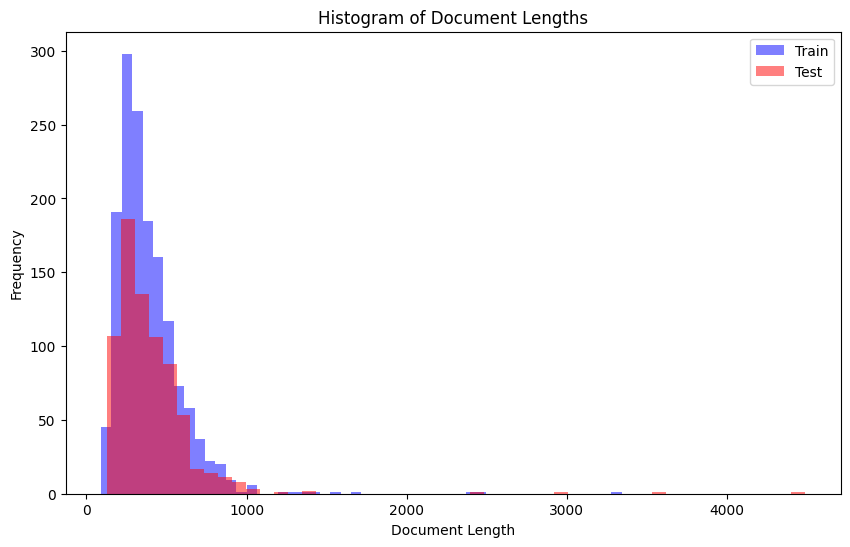

In [24]:
import matplotlib.pyplot as plt

# Calculate document lengths
train['Doc_Length'] = train['Text'].apply(lambda x: len(x.split()))
test['Doc_Length'] = test['Text'].apply(lambda x: len(x.split()))

# Plot histograms of document lengths
plt.figure(figsize=(10, 6))
plt.hist(train['Doc_Length'], bins=50, alpha=0.5, color='blue', label='Train')
plt.hist(test['Doc_Length'], bins=50, alpha=0.5, color='red', label='Test')
plt.title('Histogram of Document Lengths')
plt.xlabel('Document Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()


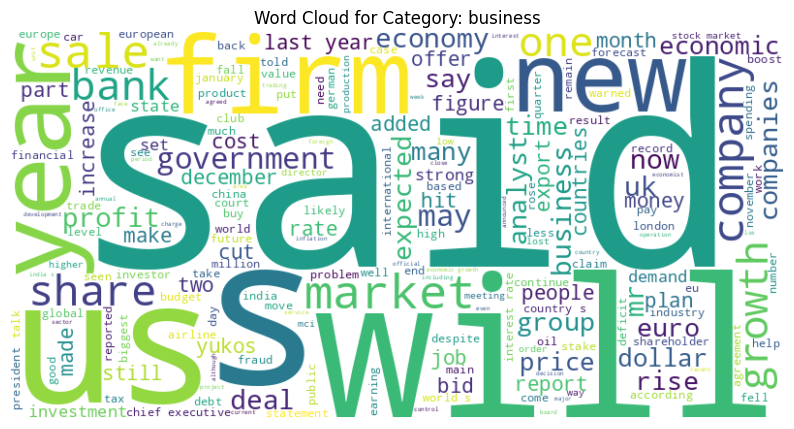

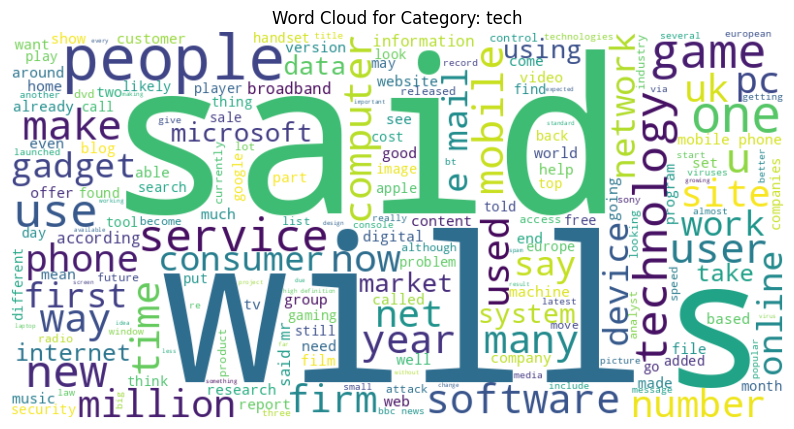

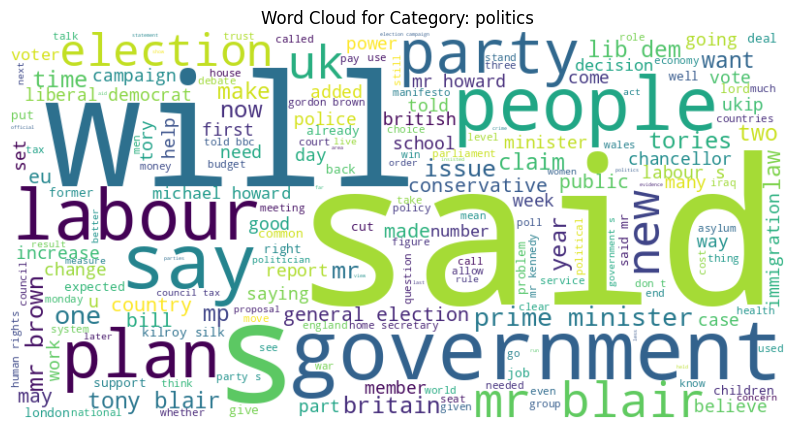

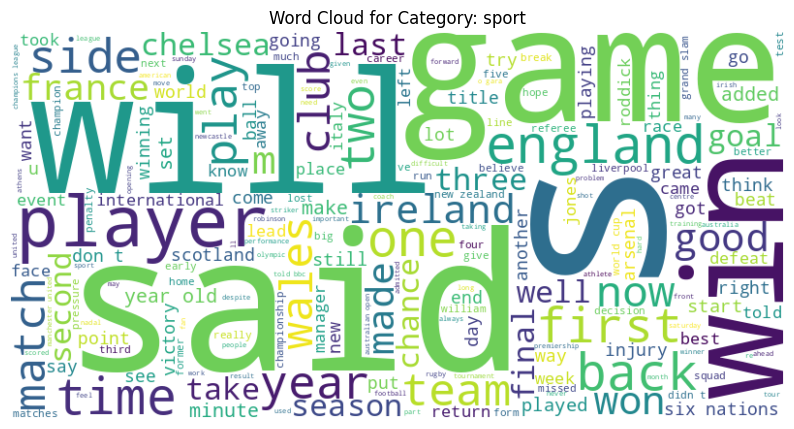

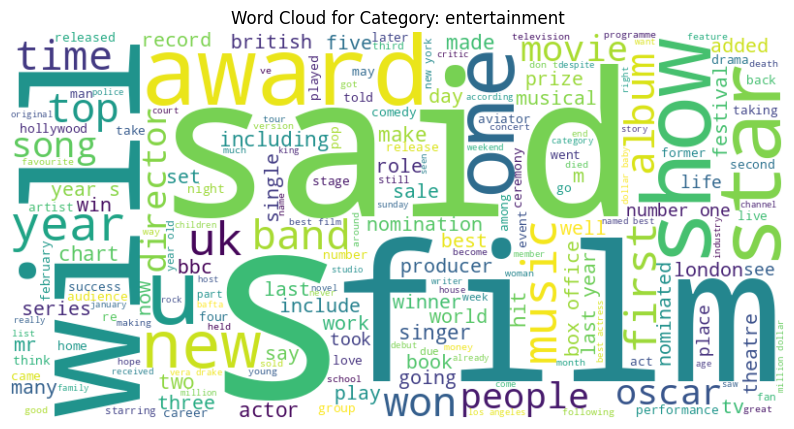

In [25]:
from wordcloud import WordCloud

# Generate word clouds for each category
categories = train['Category'].unique()
for category in categories:
    text = ' '.join(train[train['Category'] == category]['Text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Category: {category}')
    plt.axis('off')
    plt.show()


In [26]:
# Additional words to remove
additional_stop_words = ['said', 'mr', 'would', 'will', 'also']

# Function to clean text
def clean_text(text):
    text = re.sub(r'\b\w{1,2}\b', '', text)  # Remove short words
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = word_tokenize(text)  # Tokenize
    stop_words = set(stopwords.words('english'))
    stop_words.update(additional_stop_words)  # Add additional stop words
    text = [word for word in text if word not in stop_words]  # Remove stopwords
    return ' '.join(text)

# Apply the cleaning function to the text data
train['CleanText'] = train['Text'].apply(clean_text)
test['CleanText'] = test['Text'].apply(clean_text)

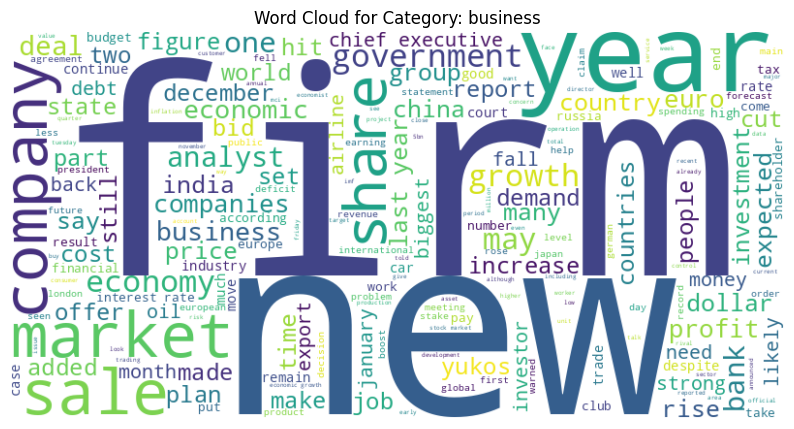

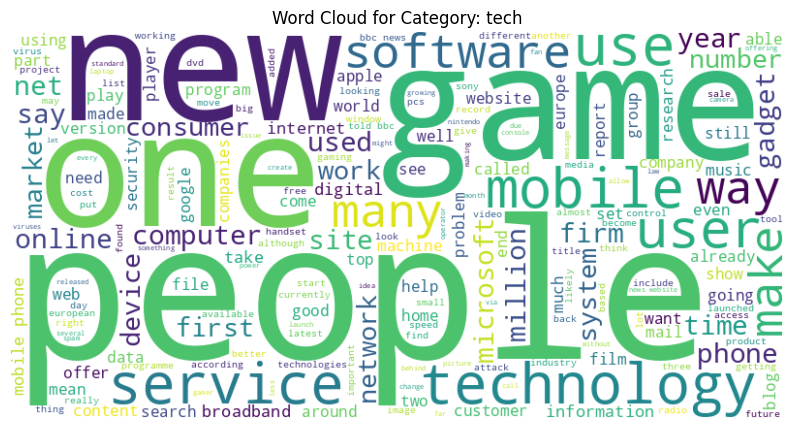

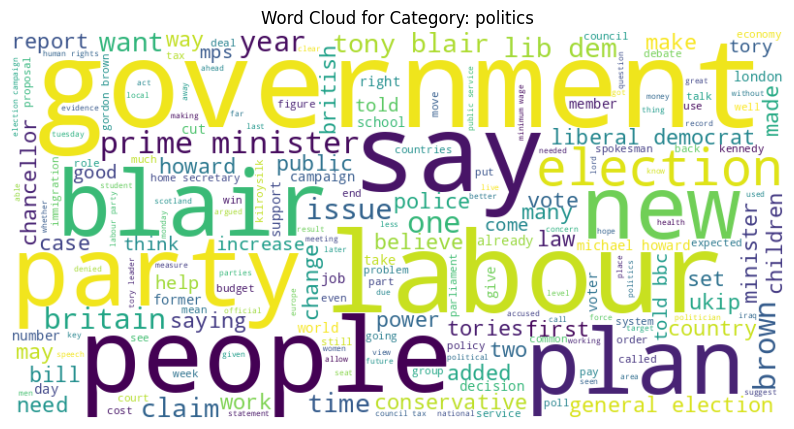

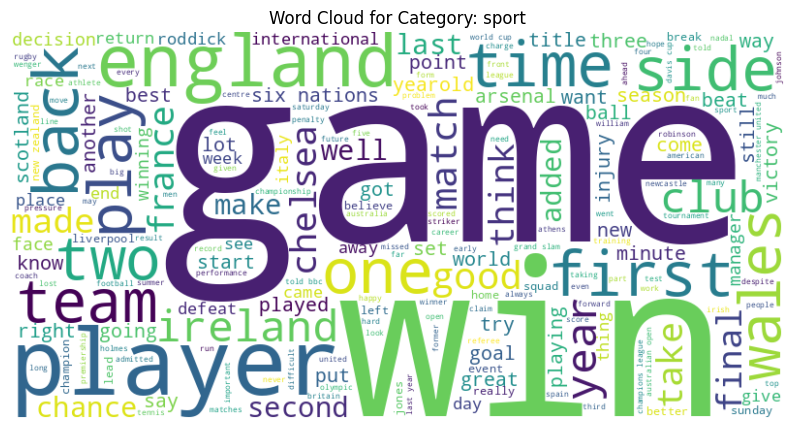

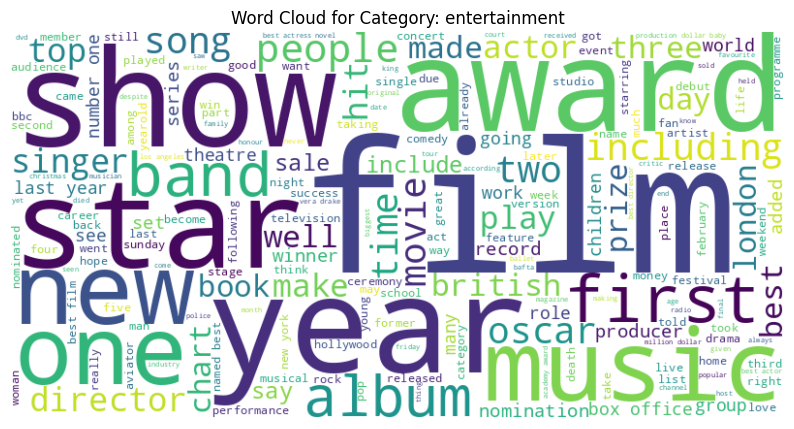

In [27]:
# Generate word clouds for each category after text cleaning
categories = train['Category'].unique()
for category in categories:
    text = ' '.join(train[train['Category'] == category]['CleanText'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Category: {category}')
    plt.axis('off')
    plt.show()


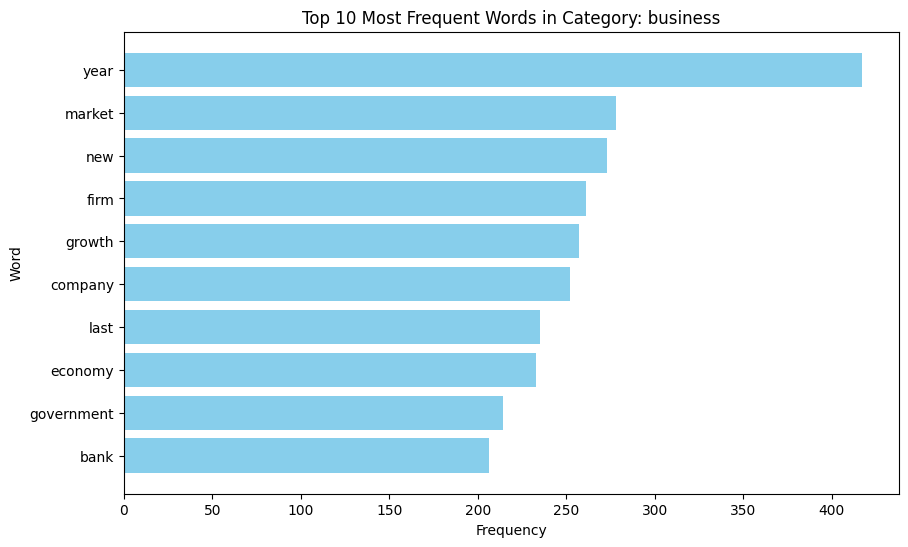

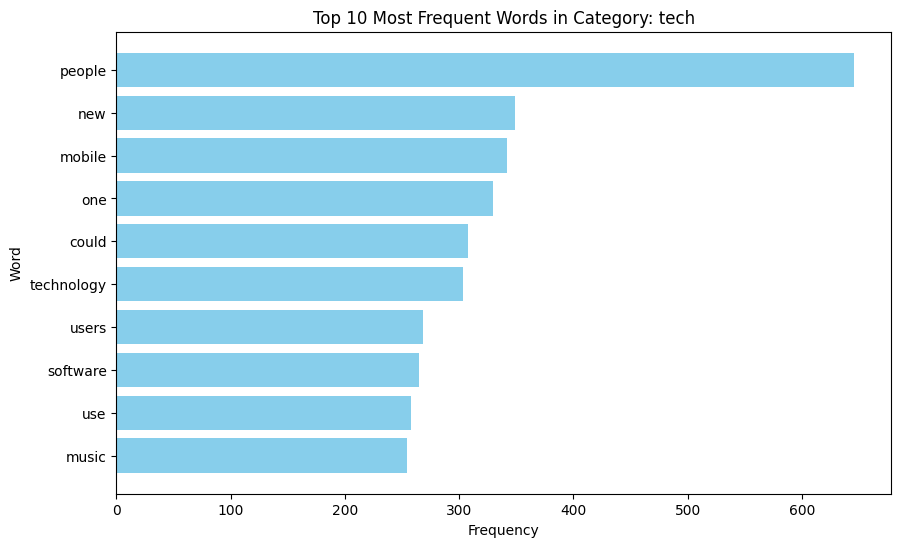

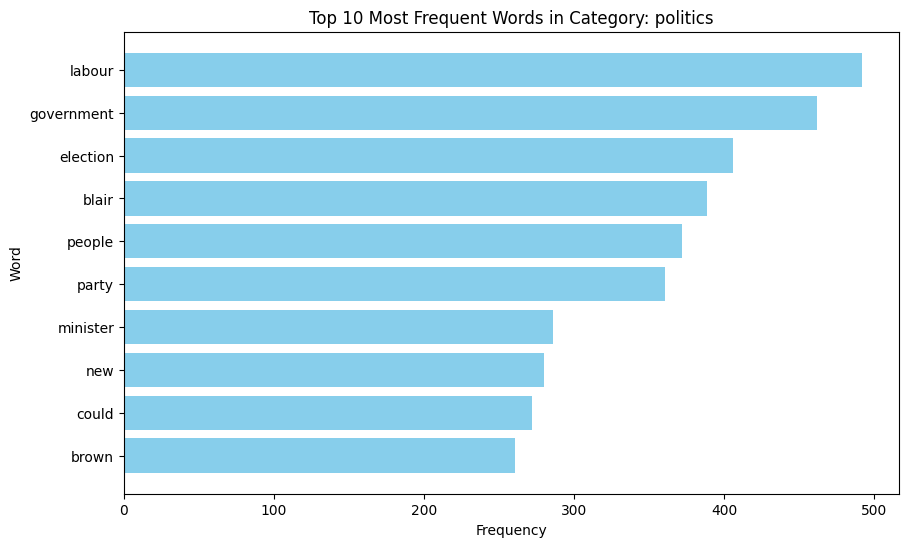

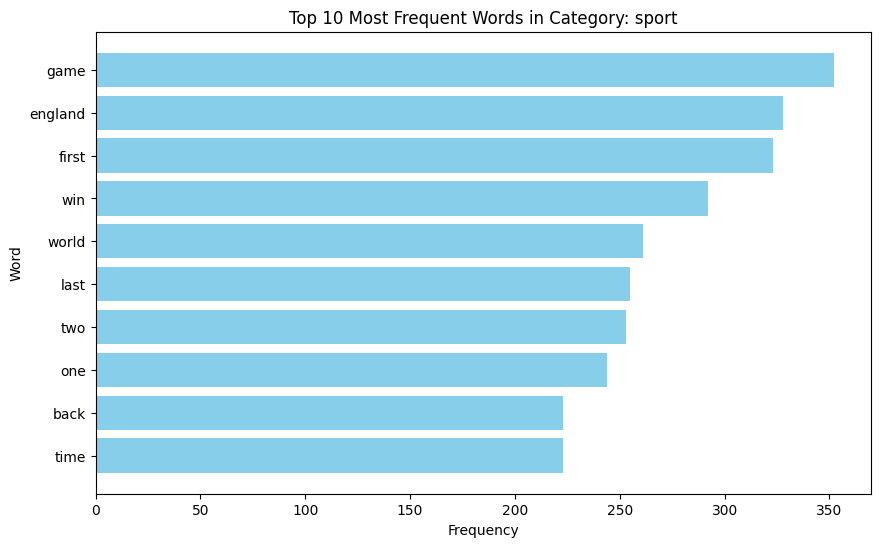

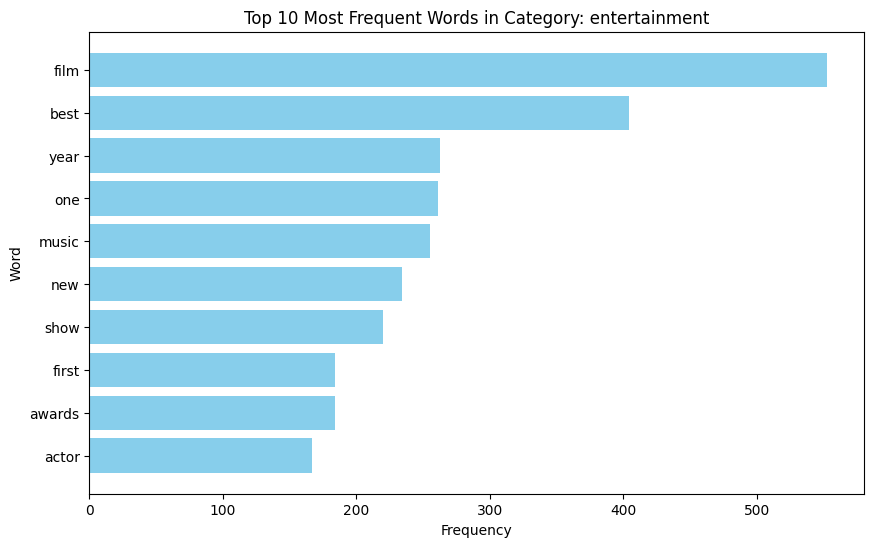

In [29]:
from collections import Counter


# Function to get the top n most common words in a text, excluding stop words and additional words
def get_top_words(text, n=10):
    words = text.split()
    word_counts = Counter(words)
    top_words = word_counts.most_common(n)
    return dict(top_words)

# Function to plot the top n most frequent words for each category, excluding stop words and additional words
def plot_top_words_per_category(df, category_col, text_col, n=10):
    categories = df[category_col].unique()
    for category in categories:
        text = ' '.join(df[df[category_col] == category][text_col])
        top_words = get_top_words(text, n)
        plt.figure(figsize=(10, 6))
        plt.barh(list(top_words.keys()), list(top_words.values()), color='skyblue')
        plt.gca().invert_yaxis()  # Invert y-axis to have the most common words at the top
        plt.title(f'Top {n} Most Frequent Words in Category: {category}')
        plt.xlabel('Frequency')
        plt.ylabel('Word')
        plt.show()

# Plot the top 10 most frequent words for each category in the training data, excluding stop words and additional words
plot_top_words_per_category(train, 'Category', 'CleanText', n=10)


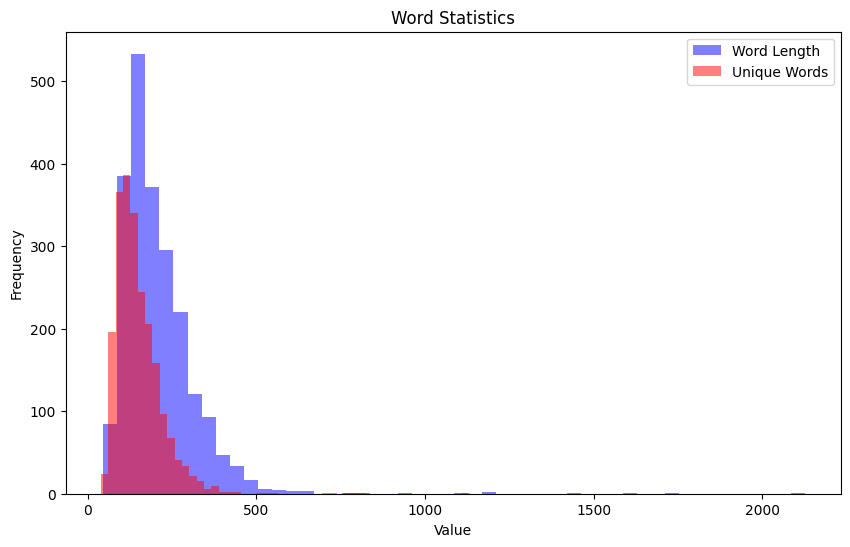

Shape of TF-IDF matrix: (2225, 30900)


In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

# Combine train and test data for analysis
combined_data_clean = pd.concat([train['CleanText'], test['CleanText']], axis=0)

# Tokenize words
combined_data_tokenized = combined_data_clean.apply(lambda x: word_tokenize(x))

# Calculate word statistics
word_lengths = combined_data_tokenized.apply(lambda x: len(x))
unique_words = combined_data_tokenized.apply(lambda x: len(set(x)))

# Plot histograms of word statistics
plt.figure(figsize=(10, 6))
plt.hist(word_lengths, bins=50, color='blue', alpha=0.5, label='Word Length')
plt.hist(unique_words, bins=50, color='red', alpha=0.5, label='Unique Words')
plt.title('Word Statistics')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(combined_data_clean)

# Display the shape of the TF-IDF matrix
print("Shape of TF-IDF matrix:", tfidf_matrix.shape)


In [31]:
from sklearn.decomposition import NMF
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Extract TF-IDF matrix from the clean text data
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(train['CleanText'])

# Perform Non-negative Matrix Factorization (NMF)
num_topics = 5  # Example number of topics
nmf_model = NMF(n_components=num_topics, random_state=42)
nmf_matrix = nmf_model.fit_transform(tfidf_matrix)

# Encode the string labels into integers
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train['Category'])

# Use the NMF topics to infer labels for the training data
train_labels_pred = nmf_matrix.argmax(axis=1)  # Select the topic with highest score as predicted label

# Evaluate performance on training data
train_accuracy = accuracy_score(train_labels_encoded, train_labels_pred)
train_confusion_matrix = confusion_matrix(train_labels_encoded, train_labels_pred)

# Infer topics for the test data
test_tfidf_matrix = tfidf_vectorizer.transform(test['CleanText'])
test_nmf_matrix = nmf_model.transform(test_tfidf_matrix)
test_labels_pred = test_nmf_matrix.argmax(axis=1)

# Display results
print("Training Accuracy:", train_accuracy)
print("Training Confusion Matrix:")
print(train_confusion_matrix)


Training Accuracy: 0.009395973154362415
Training Confusion Matrix:
[[  1   3  12   1 319]
 [  2   2  37 226   6]
 [  3 244   6   0  21]
 [343   0   0   2   1]
 [  5   1 248   4   3]]


In [32]:
# Adjusting Hyperparameters (Number of Topics)
num_topics_list = [5, 10, 15, 20]  # List of different numbers of topics to try

for num_topics in num_topics_list:
    # Perform Non-negative Matrix Factorization (NMF) with different number of topics
    nmf_model = NMF(n_components=num_topics, random_state=42)
    nmf_matrix = nmf_model.fit_transform(tfidf_matrix)

    # Use the NMF topics to infer labels for the training data
    train_labels_pred = nmf_matrix.argmax(axis=1)

    # Encode the string labels into integers
    train_labels_encoded = label_encoder.fit_transform(train['Category'])

    # Evaluate performance on training data
    train_accuracy = accuracy_score(train_labels_encoded, train_labels_pred)
    print(f"Number of Topics: {num_topics}, Training Accuracy: {train_accuracy}")


Number of Topics: 5, Training Accuracy: 0.009395973154362415
Number of Topics: 10, Training Accuracy: 0.004697986577181208
Number of Topics: 15, Training Accuracy: 0.0026845637583892616
Number of Topics: 20, Training Accuracy: 0.0026845637583892616


In [38]:

import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [39]:
from nltk.stem import WordNetLemmatizer

# Text Preprocessing (Lemmatization)
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    words = word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

# Apply lemmatization to the clean text data
train['CleanText_Lemmatized'] = train['CleanText'].apply(lemmatize_text)
test['CleanText_Lemmatized'] = test['CleanText'].apply(lemmatize_text)

# Extract TF-IDF matrix from the lemmatized text data
tfidf_matrix_lemmatized = tfidf_vectorizer.fit_transform(train['CleanText_Lemmatized'])


In [40]:
# Feature Extraction (Limiting Vocabulary Size)
max_features_list = [1000, 2000, 3000]  # List of different maximum number of features to try

for max_features in max_features_list:
    tfidf_vectorizer_max_features = TfidfVectorizer(stop_words='english', max_features=max_features)
    tfidf_matrix_max_features = tfidf_vectorizer_max_features.fit_transform(train['CleanText'])

    # Perform Non-negative Matrix Factorization (NMF) with limited vocabulary size
    nmf_model_max_features = NMF(n_components=10, random_state=42)
    nmf_matrix_max_features = nmf_model_max_features.fit_transform(tfidf_matrix_max_features)

    # Use the NMF topics to infer labels for the training data
    train_labels_pred_max_features = nmf_matrix_max_features.argmax(axis=1)

    # Encode the string labels into integers
    train_labels_encoded = label_encoder.fit_transform(train['Category'])

    # Evaluate performance on training data
    train_accuracy_max_features = accuracy_score(train_labels_encoded, train_labels_pred_max_features)
    print(f"Max Features: {max_features}, Training Accuracy: {train_accuracy_max_features}")


Max Features: 1000, Training Accuracy: 0.3268456375838926
Max Features: 2000, Training Accuracy: 0.003355704697986577
Max Features: 3000, Training Accuracy: 0.0026845637583892616


In [41]:
from nltk.stem import PorterStemmer

# Text Preprocessing (Stemming)
stemmer = PorterStemmer()

def stem_text(text):
    words = word_tokenize(text)
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)

# Apply stemming to the clean text data
train['CleanText_Stemmed'] = train['CleanText'].apply(stem_text)
test['CleanText_Stemmed'] = test['CleanText'].apply(stem_text)

# Extract TF-IDF matrix from the stemmed text data
tfidf_matrix_stemmed = tfidf_vectorizer.fit_transform(train['CleanText_Stemmed'])


In [42]:
from nltk.stem import PorterStemmer, LancasterStemmer, SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

# Define stemmers
stemmers = {
    "Porter": PorterStemmer(),
    "Lancaster": LancasterStemmer(),
    "Snowball": SnowballStemmer("english")
}

# Function to apply stemming using different stemmers
def stem_text_with_stemmer(text, stemmer):
    words = word_tokenize(text)
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)

# Apply stemming using different stemmers
for stemmer_name, stemmer_obj in stemmers.items():
    train[f'CleanText_{stemmer_name}'] = train['CleanText'].apply(lambda x: stem_text_with_stemmer(x, stemmer_obj))
    test[f'CleanText_{stemmer_name}'] = test['CleanText'].apply(lambda x: stem_text_with_stemmer(x, stemmer_obj))

# Extract TF-IDF matrix with n-grams (unigrams and bigrams)
tfidf_vectorizer_ngrams = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))
tfidf_matrix_ngrams = tfidf_vectorizer_ngrams.fit_transform(train['CleanText_Porter'])


In [43]:
from sklearn.decomposition import NMF
from sklearn.metrics import accuracy_score

# Define a function to train NMF models and evaluate performance
def train_and_evaluate(tfidf_matrix, labels):
    nmf_model = NMF(n_components=5, random_state=42)
    nmf_matrix = nmf_model.fit_transform(tfidf_matrix)
    labels_pred = nmf_matrix.argmax(axis=1)
    accuracy = accuracy_score(labels, labels_pred)
    return accuracy

# Evaluate performance for each stemmer
stemmer_accuracies = {}
for stemmer_name in stemmers:
    tfidf_matrix_stemmed = tfidf_vectorizer_ngrams.fit_transform(train[f'CleanText_{stemmer_name}'])
    accuracy = train_and_evaluate(tfidf_matrix_stemmed, train_labels_encoded)
    stemmer_accuracies[stemmer_name] = accuracy

# Print the results
for stemmer_name, accuracy in stemmer_accuracies.items():
    print(f"Stemmer: {stemmer_name}, Accuracy: {accuracy}")


Stemmer: Porter, Accuracy: 0.24161073825503357
Stemmer: Lancaster, Accuracy: 0.2389261744966443
Stemmer: Snowball, Accuracy: 0.24161073825503357


In [44]:
train.head()

ArticleId                                               Text  Category  \
0       1833  worldcom ex-boss launches defence lawyers defe...  business   
1        154  german business confidence slides german busin...  business   
2       1101  bbc poll indicates economic gloom citizens in ...  business   
3       1976  lifestyle  governs mobile choice  faster  bett...      tech   
4        917  enron bosses in $168m payout eighteen former e...  business   

   Doc_Length                                          CleanText  \
0         301  worldcom boss launches defence lawyers defendi...   
1         325  german business confidence slides german busin...   
2         514  bbc poll indicates economic gloom citizens maj...   
3         634  lifestyle governs mobile choice faster better ...   
4         355  enron bosses 168m payout eighteen former enron...   

                                CleanText_Lemmatized  \
0  worldcom bos launch defence lawyer defending f...   
1  german business confidence slide german busine...   
2  bbc poll indicates economic gloom citizen majo...   
3  lifestyle governs mobile choice faster better ...   
4  enron boss 168m payout eighteen former enron d...   

                                   CleanText_Stemmed  \
0  worldcom boss launch defenc lawyer defend form...   
1  german busi confid slide german busi confid fe...   
2  bbc poll indic econom gloom citizen major nati...   
3  lifestyl govern mobil choic faster better funk...   
4  enron boss 168m payout eighteen former enron d...   

                                    CleanText_Porter  \
0  worldcom boss launch defenc lawyer defend form...   
1  german busi confid slide german busi confid fe...   
2  bbc poll indic econom gloom citizen major nati...   
3  lifestyl govern mobil choic faster better funk...   
4  enron boss 168m payout eighteen former enron d...   

                                 CleanText_Lancaster  \
0  worldcom boss launch def lawy defend form worl...   
1  germ busy confid slid germ busy confid fel feb...   
2  bbc pol ind econom gloom cit maj nat survey bb...   
3  lifestyl govern mobl cho fast bet funky hardw ...   
4  enron boss 168m payout eighteen form enron dir...   

                                  CleanText_Snowball  
0  worldcom boss launch defenc lawyer defend form...  
1  german busi confid slide german busi confid fe...  
2  bbc poll indic econom gloom citizen major nati...  
3  lifestyl govern mobil choic faster better funk...  
4  enron boss 168m payout eighteen former enron d...

In [45]:
test.head()

ArticleId                                               Text  Doc_Length  \
0       1018  qpr keeper day heads for preston queens park r...         156   
1       1319  software watching while you work software that...         435   
2       1138  d arcy injury adds to ireland woe gordon d arc...         237   
3        459  india s reliance family feud heats up the ongo...         309   
4       1020  boro suffer morrison injury blow middlesbrough...         135   

                                           CleanText  \
0  qpr keeper day heads preston queens park range...   
1  software watching work software monitor every ...   
2  arcy injury adds ireland woe gordon arcy ruled...   
3  india reliance family feud heats ongoing publi...   
4  boro suffer morrison injury blow middlesbrough...   

                                CleanText_Lemmatized  \
0  qpr keeper day head preston queen park ranger ...   
1  software watching work software monitor every ...   
2  arcy injury add ireland woe gordon arcy ruled ...   
3  india reliance family feud heat ongoing public...   
4  boro suffer morrison injury blow middlesbrough...   

                                   CleanText_Stemmed  \
0  qpr keeper day head preston queen park ranger ...   
1  softwar watch work softwar monitor everi keyst...   
2  arci injuri add ireland woe gordon arci rule i...   
3  india relianc famili feud heat ongo public spa...   
4  boro suffer morrison injuri blow middlesbrough...   

                                    CleanText_Porter  \
0  qpr keeper day head preston queen park ranger ...   
1  softwar watch work softwar monitor everi keyst...   
2  arci injuri add ireland woe gordon arci rule i...   
3  india relianc famili feud heat ongo public spa...   
4  boro suffer morrison injuri blow middlesbrough...   

                                 CleanText_Lancaster  \
0  qpr keep day head preston queen park rang keep...   
1  softw watch work softw monit every keystrok ac...   
2  arcy injury ad ireland woe gordon arcy rul ire...   
3  ind rely famy feud heat ongo publ spat two hei...   
4  boro suff morrison injury blow middlesbrough m...   

                                  CleanText_Snowball  
0  qpr keeper day head preston queen park ranger ...  
1  softwar watch work softwar monitor everi keyst...  
2  arci injuri add ireland woe gordon arci rule i...  
3  india relianc famili feud heat ongo public spa...  
4  boro suffer morrison injuri blow middlesbrough...